# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

## imports

In [2]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [4]:
from scr.RQ1_forecast import *

In [1]:
pd.options.display.max_columns = None

NameError: name 'pd' is not defined

In [3]:
def first_horizon_ks(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(168*i, 168*i+24)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

def first_horizon_ks_exchange(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(i*30, i*30+30)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

In [5]:
model_name = 'deepstate'
with open(f'/home/dev/deepts/configs/ks_config_{model_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)


# Electricity

101it [00:00, 39848.06it/s]
100%|###########| 100/100 [01:08<00:00,  1.46it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deepstate_electricity is =0.20641767676767675

---------------------------------------------



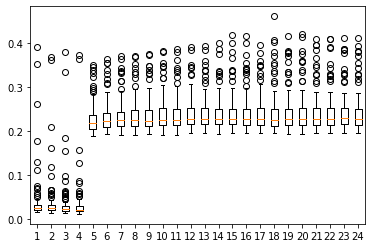

In [6]:
model_name = config['model_name']
dataset_name = "electricity" 
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plot1/ks_{model_name}_{dataset_name}')


In [7]:
print(f'the mean is {ks_array_electricity.mean()}')

the mean is 0.20641767676767675


In [8]:
pd.DataFrame({'mean' : ks_array_electricity.mean(axis=0),'std' :ks_array_electricity.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.040814,0.039012,0.036709,0.035404,0.229434,0.233554,0.236214,0.237376,0.238297,0.239808,0.240228,0.241111,0.241026,0.240145,0.242063,0.242564,0.240921,0.243267,0.241879,0.242994,0.243321,0.242543,0.242711,0.242628
std,0.057007,0.053854,0.051774,0.051852,0.035423,0.037329,0.037647,0.038126,0.039215,0.039908,0.039917,0.039911,0.040373,0.040285,0.043372,0.044234,0.041623,0.049662,0.045984,0.047341,0.046171,0.045878,0.045545,0.046198


# Solar_nips

101it [00:00, 7546.53it/s]
100%|###########| 100/100 [02:16<00:00,  1.37s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deepstate_solar_nips is =0.016622979797979796

---------------------------------------------



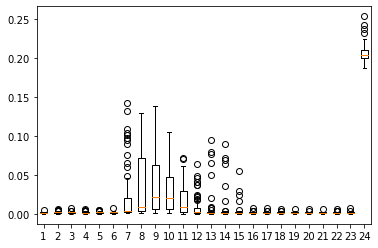

In [9]:
dataset_name = 'solar_nips'
if config[dataset_name] is not None:
    ks_array_solar = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=137, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_solar)
    plt.savefig(f'/home/dev/deepts/plot1/ks_{model_name}_{dataset_name}')



In [10]:
print(f'the mean is {ks_array_solar.mean()}')

the mean is 0.016622979797979796


In [11]:
pd.DataFrame({'mean' : ks_array_solar.mean(axis=0),'std' :ks_array_solar.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.001838,0.002333,0.002354,0.002188,0.002356,0.002699,0.019499,0.035879,0.039093,0.030034,0.016895,0.007729,0.005962,0.005339,0.003303,0.002113,0.002051,0.002040,0.002002,0.001980,0.001968,0.001990,0.002008,0.205299
std,0.000750,0.000984,0.000884,0.000917,0.000913,0.001062,0.031114,0.043820,0.039500,0.028146,0.017673,0.011802,0.016005,0.014610,0.006492,0.000880,0.000884,0.000836,0.000738,0.000767,0.000770,0.000842,0.000889,0.010221


# Exchange rate

101it [00:00, 28332.31it/s]
100%|###########| 100/100 [00:02<00:00, 41.11it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
Mean of deepstate_exchange_rate is =0.10986363636363636

---------------------------------------------



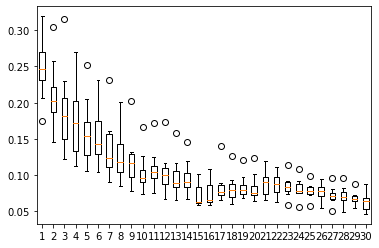

In [6]:
dataset_name = "exchange_rate"
if config[dataset_name] is not None:
    ks_array_exchange = first_horizon_ks_exchange(data_address_val=config[dataset_name], num_time_series=40, train_series_number_ks=8, prediction_length=30, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_exchange)
    plt.savefig(f'/home/dev/deepts/plot1/ks_{model_name}_{dataset_name}')

In [7]:
print(f'the mean is {ks_array_exchange.mean()}')

the mean is 0.10986363636363636


In [8]:
pd.DataFrame({'mean' : ks_array_exchange.mean(axis=0),'std' :ks_array_exchange.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean,0.248561,0.210126,0.190758,0.174621,0.160328,0.153763,0.137803,0.127449,0.120657,0.104773,...,0.089596,0.086742,0.084470,0.081540,0.078561,0.077399,0.071995,0.071490,0.068889,0.063434
std,0.042263,0.047246,0.056834,0.049664,0.044765,0.036863,0.041910,0.034818,0.035275,0.027202,...,0.016949,0.015823,0.014858,0.014158,0.011089,0.011657,0.012073,0.012719,0.008761,0.011970


# Traffic_nips

In [15]:
dataset_name = 'traffic_nips'
if config[dataset_name] is not None:
    ks_array_traffic = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=963, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_traffic)
    plt.savefig(f'/home/dev/deepts/plot1/ks_{model_name}_{dataset_name}')

101it [00:00, 35568.82it/s]
 85%|##########2 | 85/100 [22:53<04:29, 18.00s/it]

In [16]:
print(f'the mean is {ks_array_traffic.mean()}')

NameError: name 'ks_array_traffic' is not defined

In [17]:
pd.DataFrame({'mean' : ks_array_traffic.mean(axis=0),'std' :ks_array_traffic.std(axis=0)}).T

NameError: name 'pd' is not defined